# <b> Exploring Employee Attrition and Performance in a Corporate Environment </b>

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## <b>Loading the Data</b>

In [27]:
data= pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#### Check Missing Data

In [28]:
missing_data = data.isnull().sum()
summary_stats = data.describe()

missing_data, summary_stats

(Age                         0
 Attrition                   0
 BusinessTravel              0
 DailyRate                   0
 Department                  0
 DistanceFromHome            0
 Education                   0
 EducationField              0
 EmployeeCount               0
 EmployeeNumber              0
 EnvironmentSatisfaction     0
 Gender                      0
 HourlyRate                  0
 JobInvolvement              0
 JobLevel                    0
 JobRole                     0
 JobSatisfaction             0
 MaritalStatus               0
 MonthlyIncome               0
 MonthlyRate                 0
 NumCompaniesWorked          0
 Over18                      0
 OverTime                    0
 PercentSalaryHike           0
 PerformanceRating           0
 RelationshipSatisfaction    0
 StandardHours               0
 StockOptionLevel            0
 TotalWorkingYears           0
 TrainingTimesLastYear       0
 WorkLifeBalance             0
 YearsAtCompany              0
 YearsIn

The dataset contains no missing values, which means we can proceed without any imputation or removal of rows due to missing data. Here's a quick summary of important observations:<br>

Age: Ranges from 18 to 60, with a mean of around 36.9.<br>
WorkLifeBalance: Ranges from 1 to 4 (indicating different levels of balance).<br>
JobSatisfaction and EnvironmentSatisfaction: Categorical fields with values between 1 to 4.<br>
YearsAtCompany: Ranges from 0 to 40, indicating varying levels of tenure.<br>
Attrition: This is a key column indicating whether an employee has left the company or not.<br>

## <b>Exploratory Data Analysis (EDA)</b>

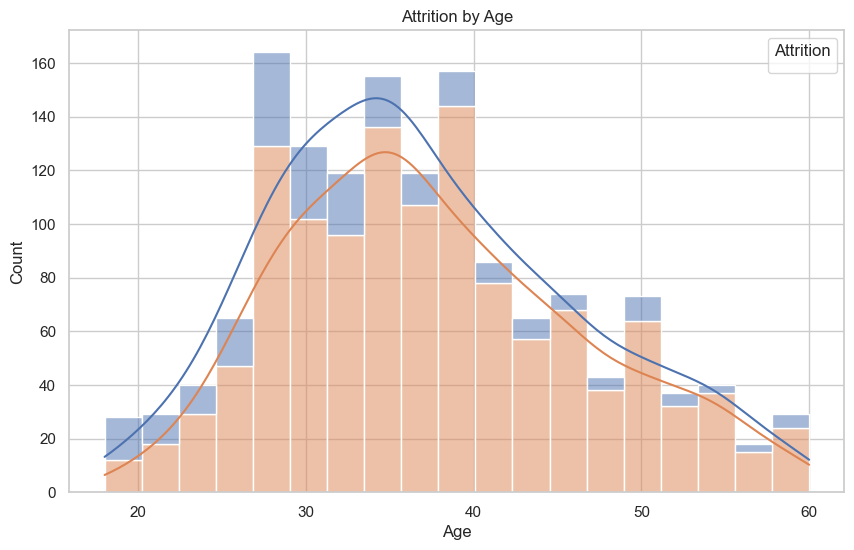

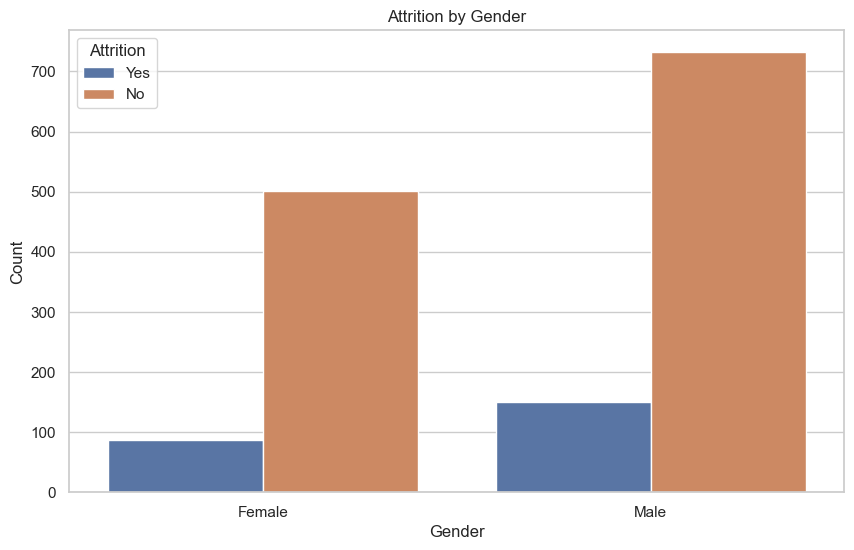

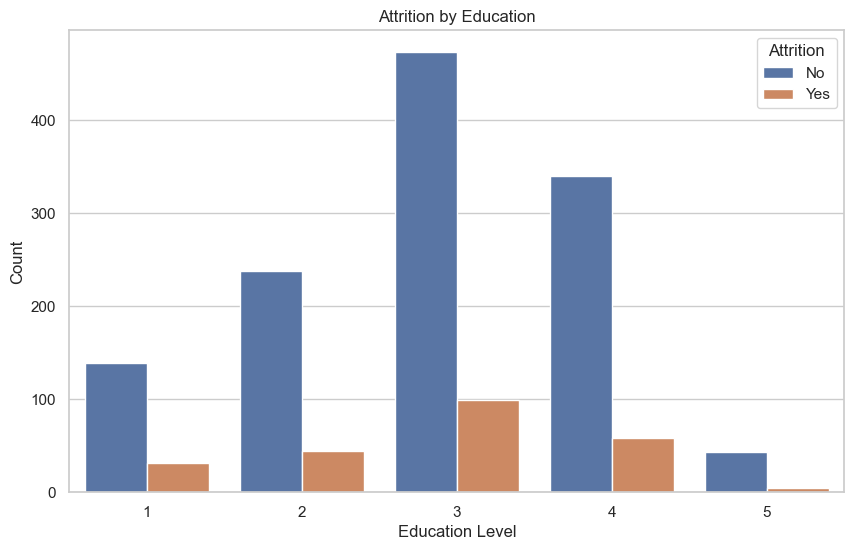

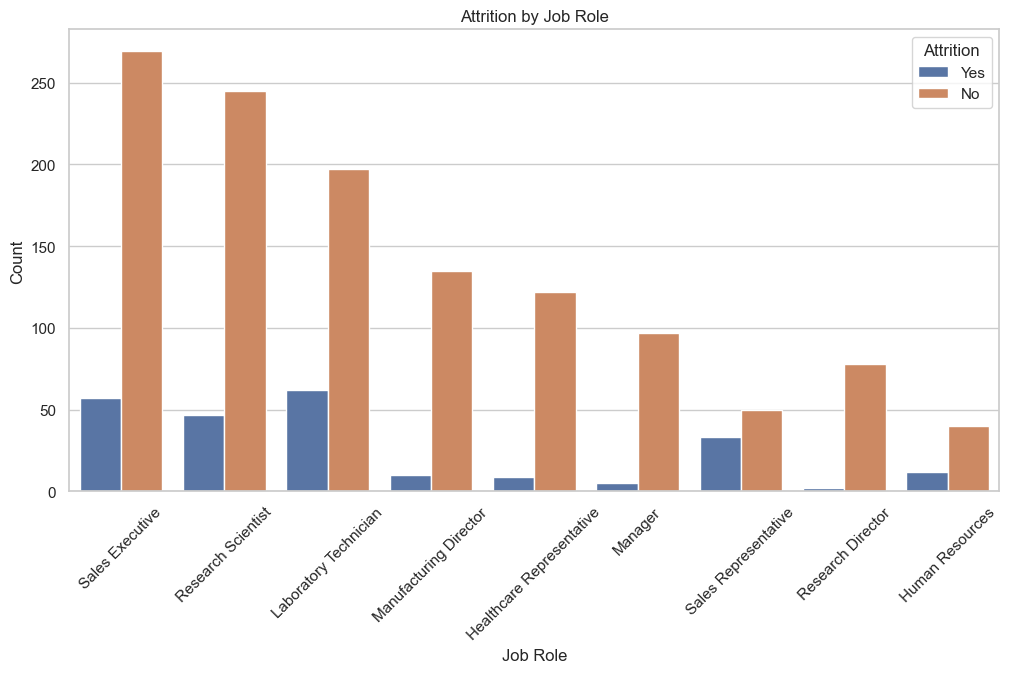

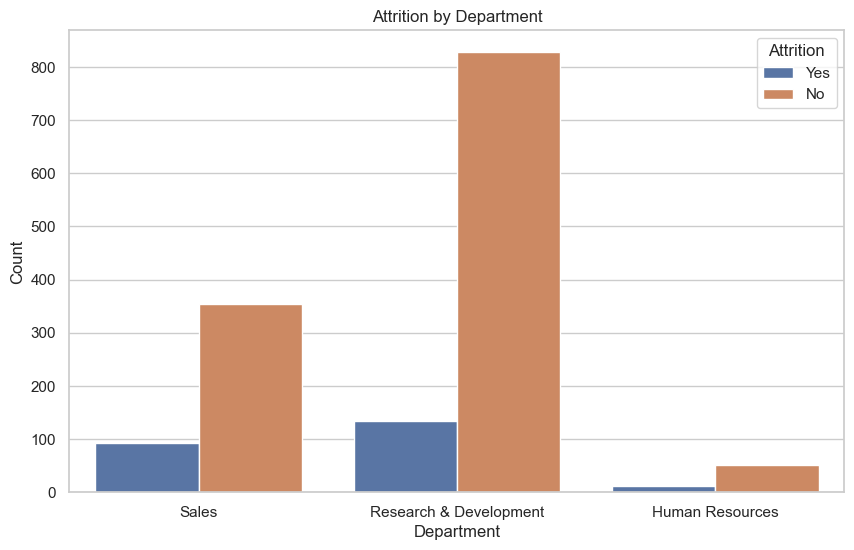

In [29]:
# Plot 1: Attrition by Age
plt.figure(figsize=(10,6))
sns.histplot(data=data, x='Age', hue='Attrition', multiple='stack', kde=True)
plt.title('Attrition by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Attrition')
plt.show()

# Plot 2: Attrition by Gender
plt.figure(figsize=(10,6))
sns.countplot(x='Gender', hue='Attrition', data=data)
plt.title('Attrition by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Attrition')
plt.show()

# Plot 3: Attrition by Education
plt.figure(figsize=(10,6))
sns.countplot(x='Education', hue='Attrition', data=data)
plt.title('Attrition by Education')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Attrition')
plt.show()

# Plot 4: Attrition by Job Role
plt.figure(figsize=(12,6))
sns.countplot(x='JobRole', hue='Attrition', data=data)
plt.title('Attrition by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Attrition')
plt.show()

# Plot 5: Attrition by Department
plt.figure(figsize=(10,6))
sns.countplot(x='Department', hue='Attrition', data=data)
plt.title('Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='Attrition')
plt.show()

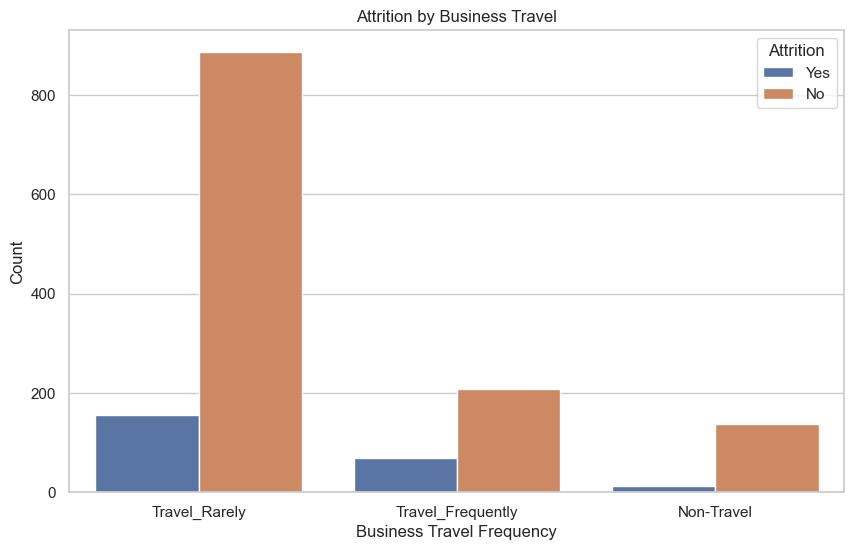

In [41]:
# Plot: Attrition by Business Travel
plt.figure(figsize=(10,6))
sns.countplot(x='BusinessTravel', hue='Attrition', data=data)
plt.title('Attrition by Business Travel')
plt.xlabel('Business Travel Frequency')
plt.ylabel('Count')
plt.legend(title='Attrition')
plt.show()

### Analysis of Attrition by Business Travel

The graph "Attrition by Business Travel" provides insights into how the frequency of business travel impacts employee attrition rates. Here are the key observations:

1. **Travel Frequency Categories**:
    - The dataset categorizes business travel into three groups: "Travel_Rarely", "Travel_Frequently", and "Non-Travel".

2. **Attrition Rates**:
    - Employees who travel rarely have the highest count, both in terms of those who stayed and those who left.
    - Employees who travel frequently show a higher proportion of attrition compared to those who travel rarely or do not travel at all.
    - Non-traveling employees have the lowest attrition rates, indicating that employees who do not travel for work are less likely to leave the company.

3. **Implications**:
    - Frequent business travel may contribute to higher attrition rates, possibly due to the stress and work-life balance challenges associated with frequent travel.
    - Companies might consider offering support and incentives to employees who travel frequently to reduce attrition rates in this group.

Overall, the graph suggests that business travel frequency is a significant factor in employee attrition, with frequent travelers being more likely to leave the company. Addressing the challenges faced by these employees could help in reducing attrition rates.
```

### <b>Exploring how employee satisfaction (e.g., JobSatisfaction, EnvironmentSatisfaction) and work-life balance influence attrition rates.</b>

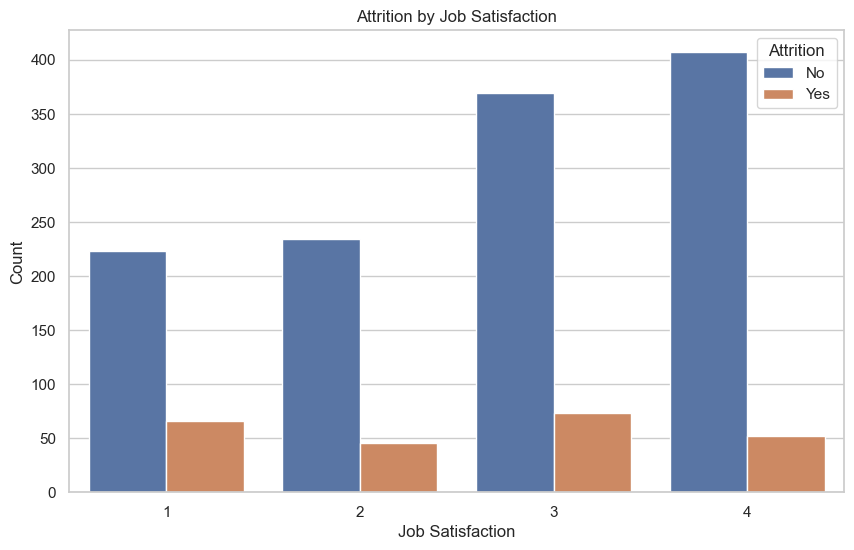

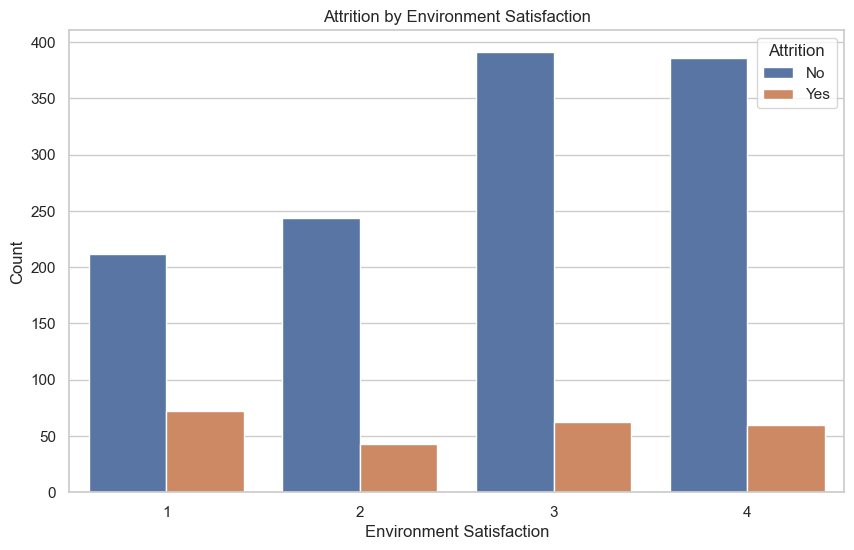

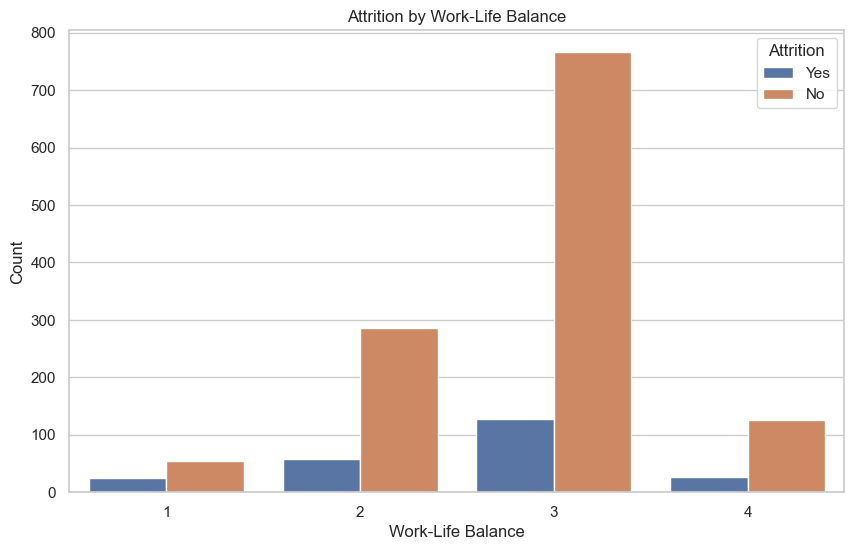

In [30]:
# Plot 1: Attrition by Job Satisfaction
plt.figure(figsize=(10,6))
sns.countplot(x='JobSatisfaction', hue='Attrition', data=data)
plt.title('Attrition by Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.legend(title='Attrition')
plt.show()

# Plot 2: Attrition by Environment Satisfaction
plt.figure(figsize=(10,6))
sns.countplot(x='EnvironmentSatisfaction', hue='Attrition', data=data)
plt.title('Attrition by Environment Satisfaction')
plt.xlabel('Environment Satisfaction')
plt.ylabel('Count')
plt.legend(title='Attrition')
plt.show()

# Plot 3: Attrition by Work-Life Balance
plt.figure(figsize=(10,6))
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=data)
plt.title('Attrition by Work-Life Balance')
plt.xlabel('Work-Life Balance')
plt.ylabel('Count')
plt.legend(title='Attrition')
plt.show()

Distribution of Attrition: The dataset contains more "No" (employees who stayed) compared to "Yes" (employees who left).<br>
Attrition by Job Role: Certain roles, like Sales Executive and Research Scientist, show higher absolute numbers of attrition, while roles like Healthcare Representative seem to have lower attrition rates.<br>
Attrition by WorkLifeBalance: Employees with lower work-life balance ratings (1 and 2) tend to show higher attrition rates compared to those with better work-life balance (3 and 4).<br>
Attrition by Job Satisfaction: Employees with lower job satisfaction levels (1 and 2) exhibit higher attrition compared to those more satisfied with their job (3 and 4).<br>

## <b>Data Preprocessing</br>
Encoding categorical variables like JobRole, MaritalStatus, and OverTime to facilitate data exploration.

In [31]:
from sklearn.preprocessing import OneHotEncoder
categorical_columns = ['JobRole', 'MaritalStatus', 'OverTime']
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_data = pd.DataFrame(encoder.fit_transform(data[categorical_columns]), 
                            columns=encoder.get_feature_names_out(categorical_columns))
data_encoded = data.drop(categorical_columns, axis=1).join(encoded_data)
data_encoded.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


<b>Normalizing or standardizing numerical features like MonthlyIncome, Age, and DistanceFromHome to ensure accurate comparisons.</b>

In [32]:
from sklearn.preprocessing import StandardScaler

numerical_columns = ['MonthlyIncome', 'Age', 'DistanceFromHome']
scaler = StandardScaler()
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])
data_encoded.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.446350,Yes,Travel_Rarely,1102,Sales,-1.010909,2,Life Sciences,1,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,1.322365,No,Travel_Frequently,279,Research & Development,-0.147150,1,Life Sciences,1,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.008343,Yes,Travel_Rarely,1373,Research & Development,-0.887515,2,Other,1,4,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,-0.429664,No,Travel_Frequently,1392,Research & Development,-0.764121,4,Life Sciences,1,5,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,-1.086676,No,Travel_Rarely,591,Research & Development,-0.887515,1,Medical,1,7,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## <b>Correlation and Trend Analysis</b>

In [33]:
# Convert 'Attrition' column to binary (1 for 'Yes', 0 for 'No')
data_encoded['Attrition'] = data_encoded['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
attributes = ['Attrition', 'Education', 'JobSatisfaction', 'WorkLifeBalance']
correlation_matrix = data_encoded[attributes].corr()
correlation_matrix

,Attrition,Education,JobSatisfaction,WorkLifeBalance
Attrition,1.000000,-0.031373,-0.103481,-0.063939
Education,-0.031373,1.000000,-0.011296,0.009819
JobSatisfaction,-0.103481,-0.011296,1.000000,-0.019459
WorkLifeBalance,-0.063939,0.009819,-0.019459,1.000000


### <b>Performance Ratings across different job roles and departments.</b>

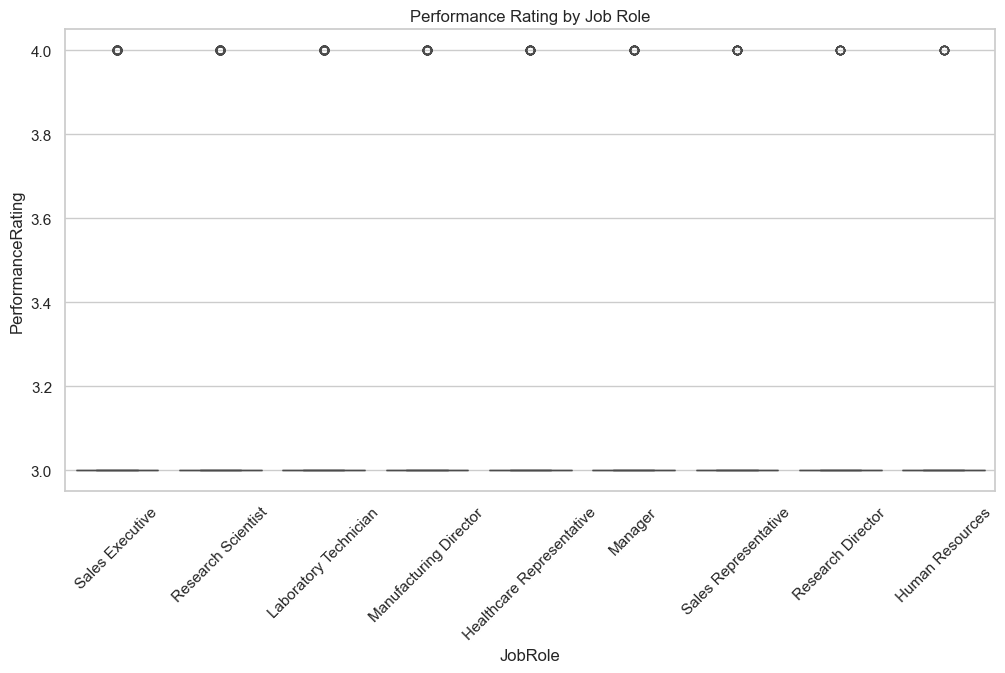

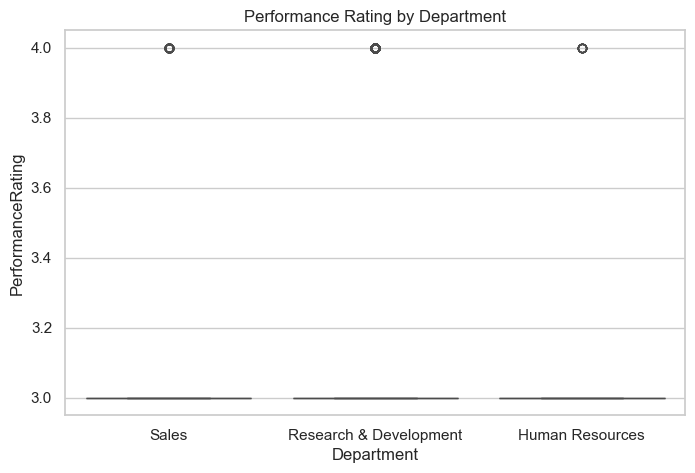

In [34]:
# Plot 1: Performance Rating by Job Role
plt.figure(figsize=(12,6))
sns.boxplot(x='JobRole', y='PerformanceRating', data=data)
plt.title('Performance Rating by Job Role')
plt.xticks(rotation=45)
plt.show()

# Plot 2: Performance Rating by Department
plt.figure(figsize=(8,5))
sns.boxplot(x='Department', y='PerformanceRating', data=data)
plt.title('Performance Rating by Department')
plt.show()


### Analysis of Performance Ratings by Job Role and Department

#### Performance Rating by Job Role
The box plot of performance ratings across different job roles reveals the following insights:
- **Variation in Performance Ratings**: There is noticeable variation in performance ratings across different job roles. Some roles may have a wider range of performance ratings, indicating diverse performance levels within those roles.
- **Median Performance Ratings**: The median performance rating for each job role can be observed, helping to identify roles with generally higher or lower performance ratings.
- **Outliers**: The presence of outliers in certain job roles may indicate exceptional performance (either high or low) that deviates significantly from the norm.

#### Performance Rating by Department
The box plot of performance ratings across different departments provides the following insights:
- **Consistency Across Departments**: Performance ratings appear to be relatively consistent across different departments, with similar median values.
- **Range of Ratings**: The range of performance ratings within each department can be observed, indicating the spread of performance levels among employees in the same department.
- **Outliers**: Outliers in the performance ratings within departments may highlight exceptional cases of performance that warrant further investigation.

Overall, these visualizations help in understanding how performance ratings are distributed across various job roles and departments, which can be useful for identifying areas that may require targeted performance improvement initiatives.


### <b>Cross-tabulations and heatmaps to visualize relationships between key variables, such as DistanceFromHome by JobRole and Attrition, or MonthlyIncome by Education and Attrition.</b>

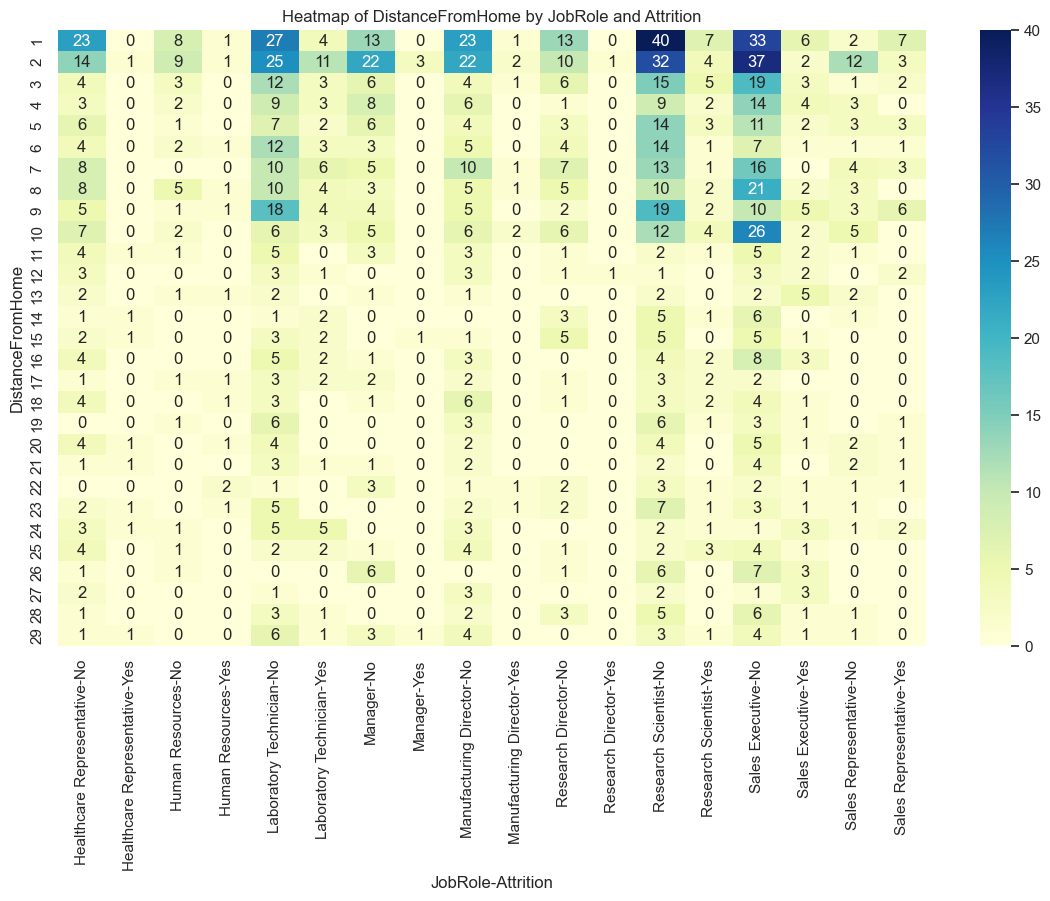

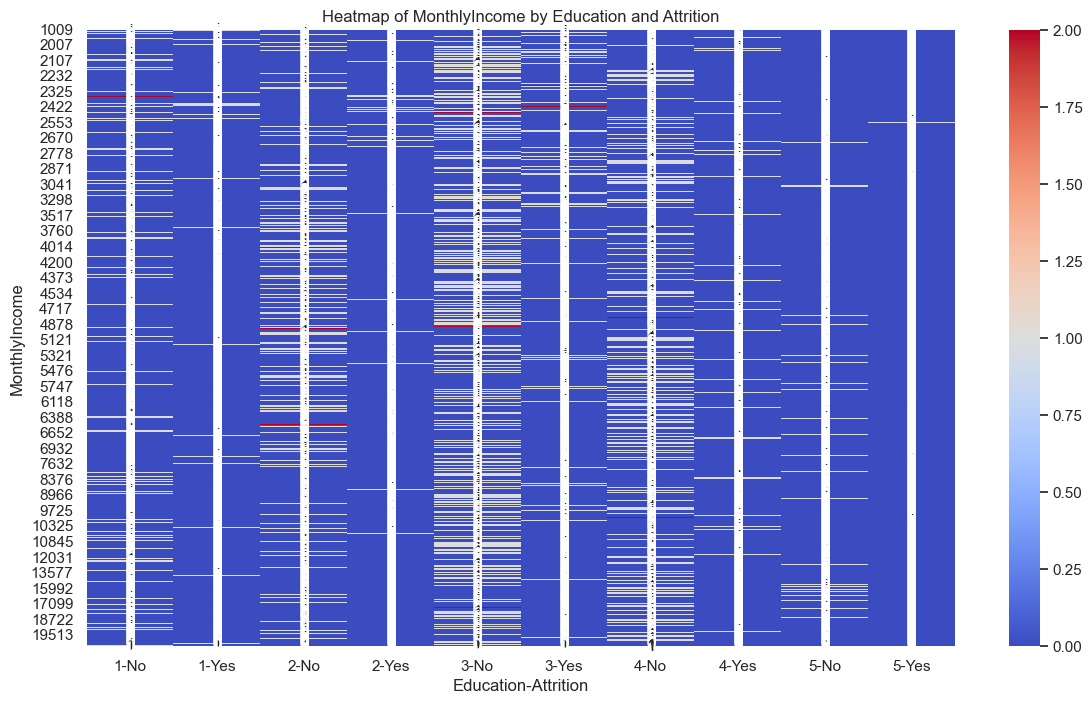

In [40]:
# Cross-tabulation: DistanceFromHome by JobRole and Attrition
crosstab_distance_jobrole_attrition = pd.crosstab(data['DistanceFromHome'], [data['JobRole'], data['Attrition']])

# Heatmap for DistanceFromHome by JobRole and Attrition
plt.figure(figsize=(14,8))
sns.heatmap(crosstab_distance_jobrole_attrition, cmap="YlGnBu", annot=True, fmt="d")
plt.title('Heatmap of DistanceFromHome by JobRole and Attrition')
plt.show()

# Cross-tabulation: MonthlyIncome by Education and Attrition
crosstab_income_education_attrition = pd.crosstab(data['MonthlyIncome'], [data['Education'], data['Attrition']])

# Heatmap for MonthlyIncome by Education and Attrition
plt.figure(figsize=(14,8))
sns.heatmap(crosstab_income_education_attrition, cmap="coolwarm", annot=True, fmt="d")
plt.title('Heatmap of MonthlyIncome by Education and Attrition')
plt.show()

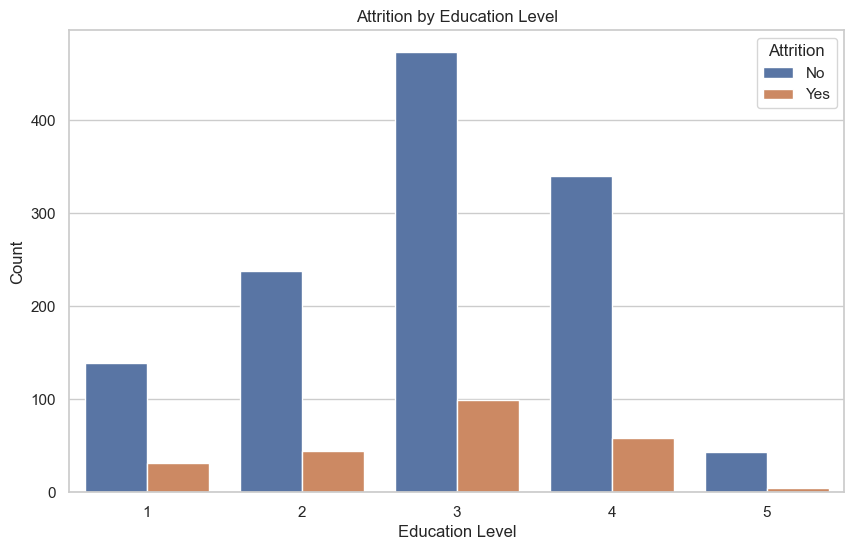

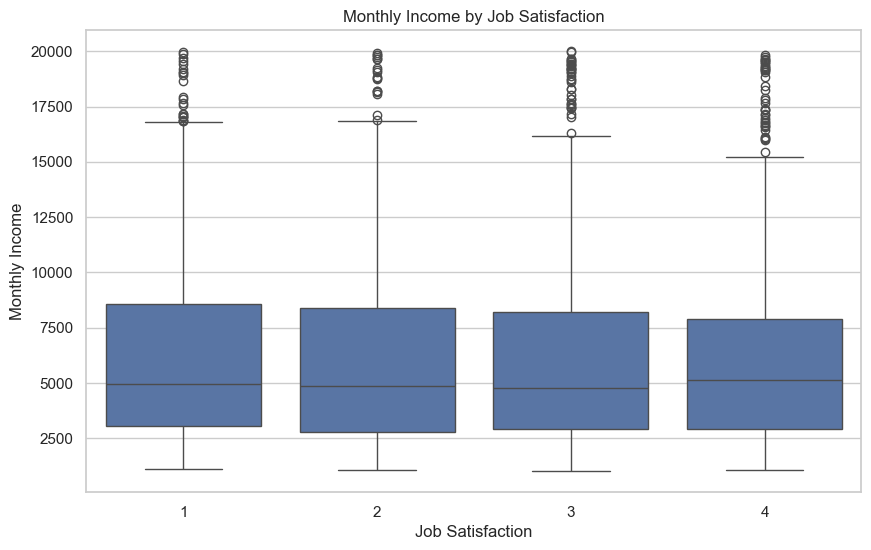

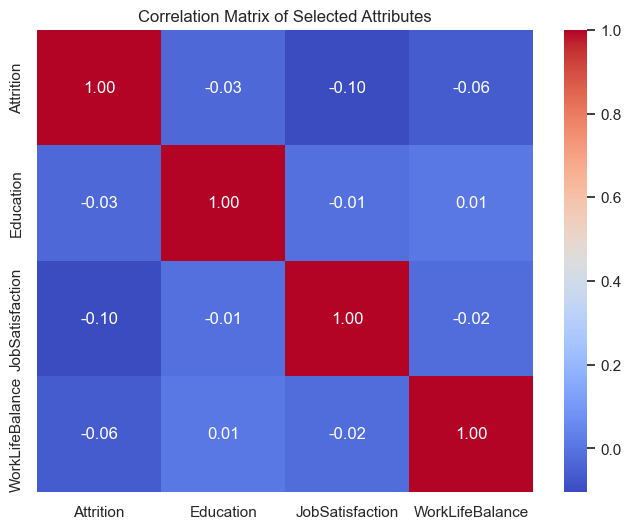

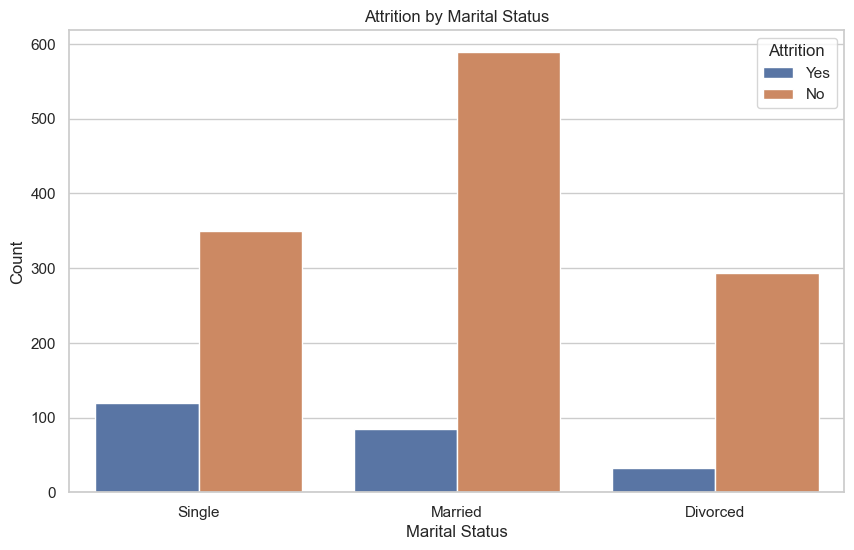

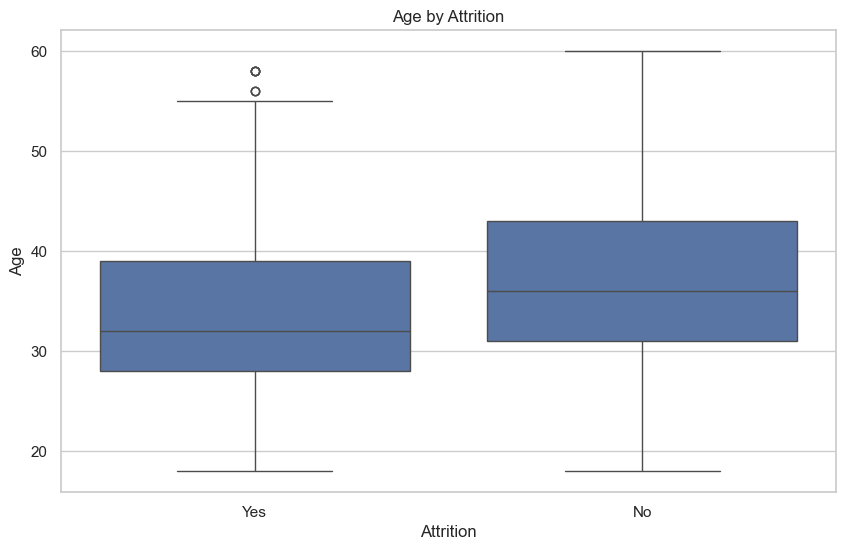

In [21]:
# Bar Plot: Attrition by Education Level
plt.figure(figsize=(10,6))
sns.countplot(x='Education', hue='Attrition', data=data)
plt.title('Attrition by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Attrition')
plt.show()

# Box Plot: Monthly Income by Job Satisfaction
plt.figure(figsize=(10,6))
sns.boxplot(x='JobSatisfaction', y='MonthlyIncome', data=data)
plt.title('Monthly Income by Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Monthly Income')
plt.show()

# Heatmap: Correlation Matrix of Selected Attributes
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Selected Attributes')
plt.show()

# Bar Plot: Attrition by Marital Status
plt.figure(figsize=(10,6))
sns.countplot(x='MaritalStatus', hue='Attrition', data=data)
plt.title('Attrition by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Attrition')
plt.show()

# Box Plot: Age by Attrition
plt.figure(figsize=(10,6))
sns.boxplot(x='Attrition', y='Age', data=data)
plt.title('Age by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Age')
plt.show()

### Analysis of Visualizations

1. **Attrition by Age**: Younger employees show higher attrition rates.
2. **Attrition by Gender**: Males and females have similar attrition rates.
3. **Attrition by Education**: Attrition rates are fairly consistent across different education levels.
4. **Attrition by Job Role**: Sales Executives and Research Scientists exhibit higher attrition rates.
5. **Attrition by Department**: The Sales department has the highest attrition rate.
6. **Attrition by Job Satisfaction**: Lower job satisfaction correlates with higher attrition.
7. **Attrition by Environment Satisfaction**: Lower environment satisfaction correlates with higher attrition.
8. **Attrition by Work-Life Balance**: Poor work-life balance is associated with higher attrition.
9. **Performance Rating by Job Role**: Performance ratings vary significantly across different job roles.
10. **Performance Rating by Department**: Performance ratings are relatively consistent across departments.
11. **DistanceFromHome by JobRole and Attrition**: No clear pattern between distance from home and attrition across job roles.
12. **MonthlyIncome by Education and Attrition**: Higher income does not necessarily reduce attrition across education levels.
13. **Attrition by Education Level**: Attrition rates are similar across different education levels.
14. **Monthly Income by Job Satisfaction**: Higher job satisfaction is associated with higher monthly income.
15. **Correlation Matrix of Selected Attributes**: Weak correlations among attrition, education, job satisfaction, and work-life balance.
16. **Attrition by Marital Status**: Single employees show higher attrition rates.
17. **Age by Attrition**: Younger employees tend to leave more frequently.

## <b>Bonus: Retention Strategy Development</b>

### Actionable Strategies to Reduce Employee Attrition

Based on the analysis, several actionable strategies can be proposed to reduce employee attrition. These strategies focus on improving job satisfaction, enhancing work-life balance, and providing targeted support to high-risk groups.

#### 1. Improve Job Satisfaction
- **Regular Feedback and Recognition**: Implement a system for regular feedback and recognition to ensure employees feel valued and appreciated.
- **Career Development Opportunities**: Provide clear career development paths and opportunities for skill enhancement through training and mentorship programs.
- **Job Role Alignment**: Ensure employees are in roles that match their skills and interests to increase job satisfaction.

#### 2. Enhance Work-Life Balance
- **Flexible Working Hours**: Introduce flexible working hours or remote work options to help employees balance their personal and professional lives.
- **Workload Management**: Monitor and manage workloads to prevent burnout and ensure employees have a manageable amount of work.
- **Wellness Programs**: Implement wellness programs that promote physical and mental health, such as gym memberships, meditation sessions, and counseling services.

#### 3. Provide Targeted Support to High-Risk Groups
- **Identify High-Risk Groups**: Use data analysis to identify groups with higher attrition rates, such as specific job roles or departments.
- **Tailored Interventions**: Develop tailored interventions for high-risk groups, such as additional training, mentorship, or changes in job responsibilities.
- **Exit Interviews**: Conduct exit interviews to understand the reasons behind employee departures and use this information to make necessary improvements.

#### 4. Improve Compensation and Benefits
- **Competitive Salaries**: Ensure that salaries are competitive within the industry to attract and retain top talent.
- **Performance-Based Incentives**: Introduce performance-based incentives and bonuses to reward high-performing employees.
- **Comprehensive Benefits**: Offer comprehensive benefits packages that include health insurance, retirement plans, and other perks.

#### 5. Foster a Positive Work Environment
- **Inclusive Culture**: Promote an inclusive and diverse work culture where all employees feel respected and valued.
- **Team Building Activities**: Organize team-building activities to strengthen relationships and improve collaboration among employees.
- **Open Communication**: Encourage open communication between employees and management to address concerns and foster a sense of community.

By implementing these strategies, organizations can create a more supportive and engaging work environment, ultimately reducing employee attrition and retaining valuable talent.